# P4 - Continuous Target Prediction Using Regression Analysis
**Author:** Karli Dean\
**Date:** November 14, 2025\
**Purpose:** This notebook predicts the fare of the passenger using multiple models (linear regression/cubic polynomial). We are using the Seaborn Titanic dataset and I aim to see if the age means more than the passenger class in this data for prediction.

## Imports

In [75]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn, sys
from sklearn.linear_model import ElasticNet, LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [76]:
import sklearn, sys

print("sklearn version:", sklearn.__version__)
print("python executable:", sys.executable)


sklearn version: 1.7.2
python executable: c:\Repos\applied-ml-karlidean2\.venv\Scripts\python.exe


## Section 1 - Import and Inspect the Data

In [77]:
# Load Titanic dataset from seaborn and verify
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Section 2 - Data Exploration and Preparation

In [78]:
titanic["age"].fillna(
    titanic["age"].median(), inplace=True
)  # Imputes missing values for the median

titanic = titanic.dropna(subset=["fare"])  # Drops rows that don't have a fare (fare is missing)
# I could impute this if I wanted to, but I am not choosing that route.

titanic["family_size"] = titanic["sibsp"] + titanic["parch"] + 1  # Creating numeric variables

titanic["sex_binary"] = pd.get_dummies(titanic["sex"], drop_first=True)

C:\Users\karli\AppData\Local\Temp\ipykernel_24460\240586634.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic["age"].fillna(


## Section 3 - Feature Selection and Justification

In [79]:
# Case 1. age
X1 = titanic[["age"]]
y1 = titanic["fare"]

# Case 2. family_size
X2 = titanic[["family_size"]]
y2 = titanic["fare"]

# Case 3. age, family_size
X3 = titanic[["age", "family_size"]]
y3 = titanic["fare"]

# Case 4. ??? (THIS IS MY CHOICE)
X4 = titanic[["sex_binary", "pclass"]]
y4 = titanic["fare"]

### Section 3 Reflection Questions

1. Why might these features affect a passenger’s fare: **Riders that are solo and wealthy are more inclined to pay a higher fare for a higher class, while family sizes that are higher are more inclined to purchase lower fares and lower classes to get their whole family on board.**
2. List all available features: **Survived, Passenger  Class, Sex, Age, Siblings or Spouses Aboard, Parents or Children Aboard, Ticket Fare, Port of Embarkation, Passenger Class (yes, a duplicate), Man/Woman/Child, Adult Male or Not, Cabin Deck, Town of Embarkation, Alive/Dead, Alone or Not.**
3. Which other features could improve predictions and why: **We could flag if someone was an adult or not, as different fares would apply, or if we could divide the ticket price by multiple people as tickets could be shared at this time.**
4. How many variables are in your Case 4: **2**
5. Which variable(s) did you choose for Case 4 and why do you feel those could make good inputs: **I put sex_binary (which is a field I created to quantify sex) and the age, to see if men were paying higher tickets than women or vice versa.**

## Section 4 - Training a Linear Regression Model

### 4.1 - Splitting the Data

In [80]:
# Creating Test Group for Case 1
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=123)

# Creating Test Group for Case 2
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=123)

# Creating Test Group for Case 3
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=123)

# Creating test Group for Case 4
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=123)

### 4.2 - Training and Evaluating Linear Regression Models

In [81]:
lr_model1 = LinearRegression().fit(X1_train, y1_train)
lr_model2 = LinearRegression().fit(X2_train, y2_train)
lr_model3 = LinearRegression().fit(X3_train, y3_train)
lr_model4 = LinearRegression().fit(X4_train, y4_train)

### 4.3 - Predictions of the Models

In [82]:
# Case 1
y_pred_train1 = lr_model1.predict(X1_train)
y_pred_test1 = lr_model1.predict(X1_test)

# Case 2
y_pred_train2 = lr_model2.predict(X2_train)
y_pred_test2 = lr_model2.predict(X2_test)

# Case 3
y_pred_train3 = lr_model3.predict(X3_train)
y_pred_test3 = lr_model3.predict(X3_test)

# Case 4
y_pred_train4 = lr_model4.predict(X4_train)
y_pred_test4 = lr_model4.predict(X4_test)

### 4.4 - Reporting the Performance of the Models

In [83]:
# Case 1
print("Case 1: Training R²:", r2_score(y1_train, y_pred_train1))
print("Case 1: Test R²:", r2_score(y1_test, y_pred_test1))
print("Case 1: Test RMSE:", np.sqrt(mean_squared_error(y1_test, y_pred_test1)))
print("Case 1: Test MAE:", mean_absolute_error(y1_test, y_pred_test1))
print('--------------------------------------------------------------------------------------')
# Case 2
print("Case 2: Training R²:", r2_score(y2_train, y_pred_train2))
print("Case 2: Test R²:", r2_score(y2_test, y_pred_test2))
print("Case 2: Test RMSE:", np.sqrt(mean_squared_error(y2_test, y_pred_test2)))
print("Case 2: Test MAE:", mean_absolute_error(y2_test, y_pred_test2))
print('--------------------------------------------------------------------------------------')
# Case 3
print("Case 3: Training R²:", r2_score(y3_train, y_pred_train3))
print("Case 3: Test R²:", r2_score(y3_test, y_pred_test3))
print("Case 3: Test RMSE:", np.sqrt(mean_squared_error(y3_test, y_pred_test3)))
print("Case 3: Test MAE:", mean_absolute_error(y3_test, y_pred_test3))
print('--------------------------------------------------------------------------------------')
# Case 4
print("Case 4: Training R²:", r2_score(y4_train, y_pred_train4))
print("Case 4: Test R²:", r2_score(y4_test, y_pred_test4))
print("Case 4: Test RMSE:", np.sqrt(mean_squared_error(y4_test, y_pred_test4)))
print("Case 4: Test MAE:", mean_absolute_error(y4_test, y_pred_test4))

Case 1: Training R²: 0.009950688019452314
Case 1: Test R²: 0.0034163395508415295
Case 1: Test RMSE: 37.97164180172938
Case 1: Test MAE: 25.28637293162364
--------------------------------------------------------------------------------------
Case 2: Training R²: 0.049915792364760736
Case 2: Test R²: 0.022231186110131973
Case 2: Test RMSE: 37.6114940041967
Case 2: Test MAE: 25.02534815941641
--------------------------------------------------------------------------------------
Case 3: Training R²: 0.07347466201590014
Case 3: Test R²: 0.049784832763073106
Case 3: Test RMSE: 37.0777586646559
Case 3: Test MAE: 24.284935030470688
--------------------------------------------------------------------------------------
Case 4: Training R²: 0.30902741887346497
Case 4: Test R²: 0.339901132876393
Case 4: Test RMSE: 30.90345156449409
Case 4: Test MAE: 20.399665642008824


### Section 4 Reflection Questions

#### Compare the Training and Testing Results for Each
1. Did Case 1 overfit or underfit? Explain: **Underfit** due to both the training and testing R2 being low and almost identical. This means the model did not capture important data patterns.
2. Did Case 2 overfit or underfit? Explain: **Underfit, but better than Case 1** due to model performance being low still, so the model is not learning enough of the relationships yet.
3. Did Case 3 overfit or underfit? Explain: **Underfit, but better than Case 2** due to the scores being low still. The model is learning more, just not enough to capture the complexity enough.
4. Did Case 4 overfit or underfit? Explain: **Neither Over or Underfit** as the training and testing R2's are good and nearly equal, meaning that the models perform equally well. This is the best balanced model we've made so far.

#### Adding Age
1. Did adding age improve the model: **Yes, it did.**
2. Propose a possible explanation (consider how age might affect ticket price, and whether the data supports that): **Passenger age may have influenced the fare price as children tended to travel at lower fares within family ticket bundles. The data supports this weakly. There is a slight relationship, but it reveals that age alone was not a major driver of ticket price.**

#### Worst
1. Which case performed the worst: **Case 1**
2. How do you know: **This regression had the lowest training and testing R2's and highest MAE/RMSE. Due to the R2's being so close to 0, we can know that the model learned almost nothing from the training set.**
3. Do you think adding more training data would improve it (and why/why not): **No, I don't believe so. The model was underfit due to poor feature selection, not limited data. So, adding more data won't help.**

#### Best
1. Which case performed the best: **Case 4**
2. How do you know: **This model had the highest R2's and lowest MAE/RMSE. We can see the model learned some meaningful patterns and generalizes the data well.**
3. Do you think adding more training data would improve it (and why/why not): **Slightly. As the model is already performing well and not overfitting, improvements would come from feature selection and tuning, rather than more records.**

## Section 5: Comparing Alternative Models

### 5.1 - Ridge Regression (L2 Penalty)

In [84]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X4_train, y4_train)
y_pred_ridge = ridge_model.predict(X4_test)

### 5.2 - Elastic Net (L1 + L2 Combined)

In [85]:
elastic_model = ElasticNet(alpha=0.3, l1_ratio=0.5)
elastic_model.fit(X4_train, y4_train)
y_pred_elastic = elastic_model.predict(X4_test)

### 5.3 - Polynomial Regression

#### Set Up the Poly Inputs

In [86]:
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X1_train)
X_test_poly = poly.transform(X1_test)

#### Use the Poly Inputs in the LR Model

In [87]:
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y1_train)
y_pred_poly = poly_model.predict(X_test_poly)

### 5.4 - Visualize Polynomial Cubic Fit (for 1 Input)

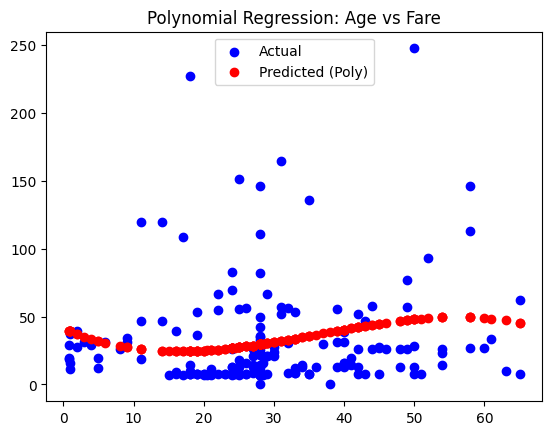

In [88]:
plt.scatter(X1_test, y1_test, color="blue", label="Actual")
plt.scatter(X1_test, y_pred_poly, color="red", label="Predicted (Poly)")
plt.legend()
plt.title("Polynomial Regression: Age vs Fare")
plt.show()

### Section 5 Reflection Questions
1. What patterns does the cubic model seem to capture: **The model seems to capture a non-linear trend where fares increase for middle-aged adults and lower fares for young children and elders.**
2. Where does it perform well or poorly: **The model performs best for middle-aged passengers and poorly for very young or very old passengers. This is due to relatively consistent prices for those who are middle aged and fluctuating prices for who are not.**
3. Did the polynomial fit outperform linear regression: **Slightly, yes. The linear model showed almost no predictive power, and the cubic model captured the nonlinear patterns, which give it relatively better performance than that of Case 1.**
4. Where (on the graph or among which kinds of data points) does it fit best: **This model is best in the mid-age range, where the data is the most dense.**

### 5.5 Compare All Models

In [89]:
def report(name, y_true, y_pred):
    print(f"{name} R²: {r2_score(y_true, y_pred):.3f}")
    print(f"{name} RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print(f"{name} MAE: {mean_absolute_error(y_true, y_pred):.2f}\n")


report("Linear", y4_test, y_pred_test4)
report("Ridge", y4_test, y_pred_ridge)
report("ElasticNet", y4_test, y_pred_elastic)
report("Polynomial", y1_test, y_pred_poly)

Linear R²: 0.340
Linear RMSE: 30.90345156449409
Linear MAE: 20.40

Ridge R²: 0.340
Ridge RMSE: 30.890499996791604
Ridge MAE: 20.36

ElasticNet R²: 0.369
ElasticNet RMSE: 30.22542494238322
ElasticNet MAE: 19.18

Polynomial R²: -0.003
Polynomial RMSE: 38.09945771470027
Polynomial MAE: 25.30



### 5.6 - Visualize Higher Order Polynomials

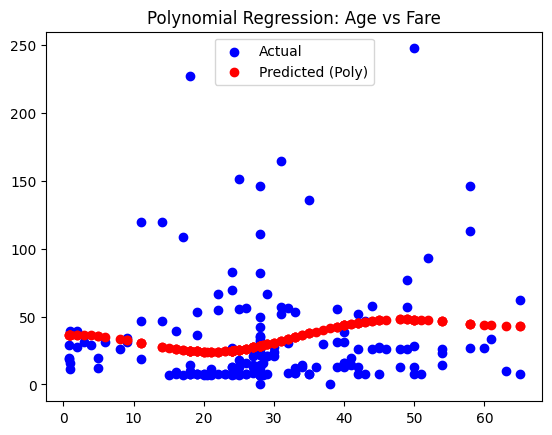

In [90]:
poly = PolynomialFeatures(degree=8)
X_train_poly2 = poly.fit_transform(X1_train)
X_test_poly2 = poly.transform(X1_test)

# Use the poly inputs in the LR model
poly_model2 = LinearRegression()
poly_model2.fit(X_train_poly2, y1_train)
y_pred_poly2 = poly_model2.predict(X_test_poly2)

# Visualize It
plt.scatter(X1_test, y1_test, color="blue", label="Actual")
plt.scatter(X1_test, y_pred_poly2, color="red", label="Predicted (Poly)")
plt.legend()
plt.title("Polynomial Regression: Age vs Fare")
plt.show()

In [91]:
def report2(name, y_true, y_pred):
    print(f"{name} R²: {r2_score(y_true, y_pred):.3f}")
    print(f"{name} RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print(f"{name} MAE: {mean_absolute_error(y_true, y_pred):.2f}\n")

report("Polynomial", y1_test, y_pred_poly2)

Polynomial R²: -0.007
Polynomial RMSE: 38.1743240294458
Polynomial MAE: 25.25



**Finding On Polynomials:** The two different polynomial models behaved very similarly. When I was messing around and put 17 as my metric, that seemed to really help the model.

## Section 6 - Final Thoughts and Insights

### 6.1 - Summarize Findings
1. What features were most useful? **The most useful features I had used were the pclass and sex.**
2. What regression model performed best? **Case 4's Linear Regression performed the best.**
3. How did model complexity or regularization affect results? **Adding complexity with the cubic polynomial helped capture the nonlinear patterns of the data, improving the performance slightly compared to the Case 1 model. However, this could also make the model more reactive to noise, which is not what we want when our feature for that data (age) is weakly related to the target (fare).**

### 6.2 - Discuss Challenges
1. Was fare hard to predict? Why or why not? **Yes, the fare was hard to predict, as this is a target that relies on many other factors than age. This is why Linear Regression 4 performed so well. We examined the class and the sex of the passenger, which introduced different metrics than the age.**
2. Did skew or outliers impact the models? **Yes, as there are a few very highly priced tickets in the dataset, this can distort both the polynomial and the linear models, which can make a model inaccurate if trying to predict low fares.**

### 6.3 - Final Review
I found this dataset to be very interesting. I had figured age would have been a bigger part of the fare rates in this dataset. It turns out that similar to the Heart Disease dataset I had used on the midterm, there is more than age that comes to play when it comes to survival and fare rates.\
I feel if I did more outlier management during the project, the models would have worked much better. However, I believe I would have received the same results, just less underfitting models.